# Modelaje y Mejora de Procesos 2023-2
#  Tarea 4 - Simulación de Monte Carlo

**Profesor:** Juan F. Pérez
**Asistente:** Carlos Arroyo


**Integrantes Grupo 4:**

* Luisa María De La Hortúa Pulido 201712785 

* David Santiago Moreno Medina 201728270 

In [2]:
from scipy.stats import randint
from scipy.stats import binom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as st
import math

1. Modelo del vendedor de periódicos.
>**a)** Modifique el modelo para que la demanda sea una variable aleatoria binomial entre 0 y 5. Modifique el parámetro $p$ (probabilidad de éxito) y describa su impacto.


In [3]:
# parámetros del modelo
min_venta = 0
max_venta = 5
precio_compra = 200
precio_venta = 250
p=0.9
#generación de demanda
n_exps = 10000
vals = binom.rvs(max_venta,p ,size=n_exps)

# decisión de compra
opc_compra = range(min_venta, max_venta+1)
retornos = pd.DataFrame()

for compra in opc_compra:
    lista_retornos = []
    for venta in vals:
        lista_retornos.append( precio_venta*min(compra,venta) - precio_compra*compra )
    retornos[str(compra)] = lista_retornos

retornos.head()

,0,1,2,3,4,5
0,0,50,100,150,200,250
1,0,50,100,150,200,250
2,0,50,100,150,200,250
3,0,50,100,150,200,0
4,0,50,100,150,200,250


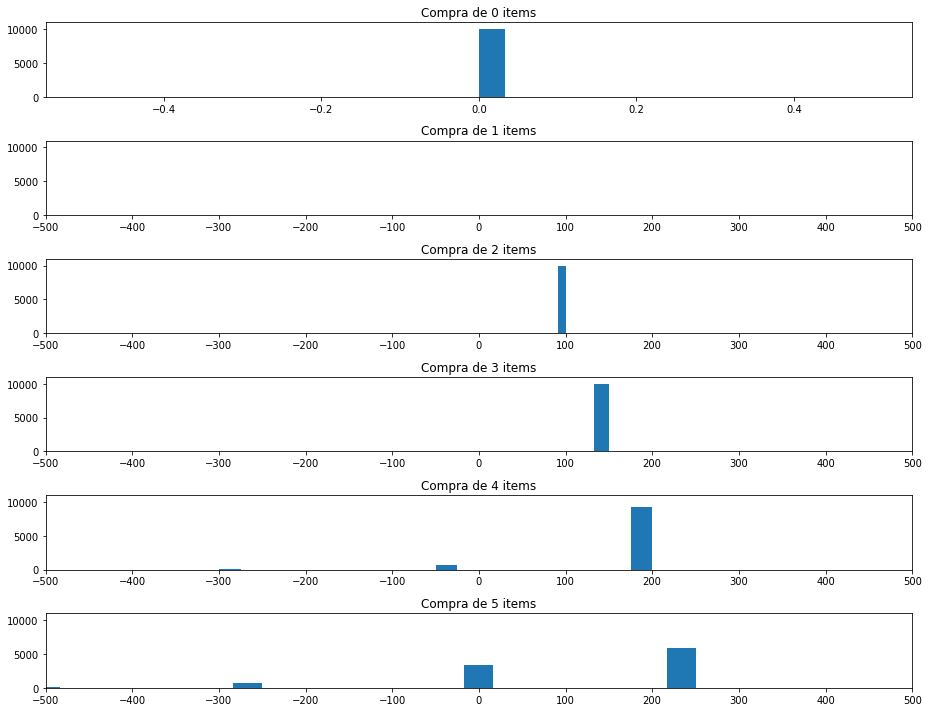

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(13, 10))

i = 0
for compra in opc_compra:
    # histograma
    axes[i].hist(x=retornos[str(compra)], bins=30)
    axes[i].set_title("Compra de {} items".format(compra))
    
    axes[i].set_ylim([0, 11000])
    if i>0:
        axes[i].set_xlim([-500, 500])
        axes[i].set_xticks(range(-500,600,100)) 
    i=i+1

fig.tight_layout()
plt.show()

In [5]:
# parámetros del modelo
min_venta = 0
max_venta = 5
precio_compra = 200
precio_venta = 250
#generación de demanda 
n_exps = 10000 
mean_1=[]
mean_2=[]
mean_3=[]
mean_4=[]
mean_5=[]
prob=[]
for i in [a/100 for a in range(0,110, 10)]: 
    p=i 
    prob.append(i)
    vals = binom.rvs(max_venta,p ,size=n_exps) 
    # decisión de compra 
    opc_compra = range(min_venta, max_venta+1) 
    retornos = pd.DataFrame() 
    for compra in opc_compra: 
        lista_retornos = [] 
        for venta in vals: 
            lista_retornos.append( precio_venta*min(compra,venta) - precio_compra*compra ) 
        retornos[str(compra)] = lista_retornos 
    mean_1.append(retornos.mean()[1])
    mean_2.append(retornos.mean()[2])
    mean_3.append(retornos.mean()[3])
    mean_4.append(retornos.mean()[4])
    mean_5.append(retornos.mean()[5])
        
    
resultados=pd.DataFrame({'p':prob,'media x=1':mean_1,
                        'media x=2':mean_2,
                        'media x=3':mean_3,
                        'media x=4':mean_4,
                        'media x=5':mean_5})
resultados

,p,media x=1,media x=2,media x=3,media x=4,media x=5
0,0.0,-200.000,-400.000,-600.000,-800.000,-1000.000
1,0.1,-97.075,-276.925,-474.550,-674.325,-874.300
2,0.2,-31.475,-166.375,-352.900,-551.275,-751.250
3,0.3,8.500,-73.600,-233.400,-426.225,-625.525
4,0.4,29.500,-6.150,-127.700,-307.000,-504.325
5,0.5,42.425,46.300,-29.400,-183.750,-376.025
6,0.6,47.400,75.900,47.025,-67.650,-247.750
7,0.7,49.225,91.475,100.625,31.325,-126.950
8,0.8,49.925,98.100,133.050,118.375,-0.175
9,0.9,50.000,99.900,147.775,178.075,126.700


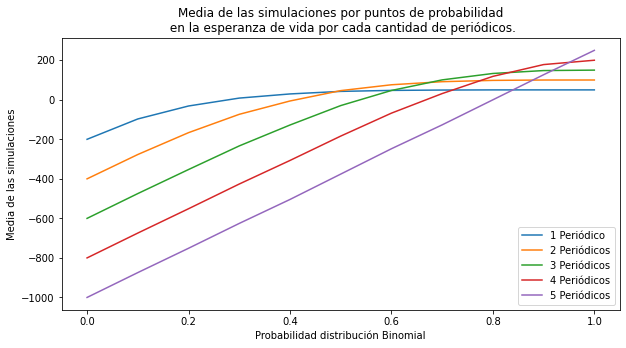

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
x=resultados['p']

ax.plot(x, resultados['media x=1'], label='1 Periódico')  # Plot some data on the axes.
ax.plot(x, resultados['media x=2'], label='2 Periódicos')  #the axes...
ax.plot(x, resultados['media x=3'], label='3 Periódicos') 
ax.plot(x, resultados['media x=4'], label='4 Periódicos') 
ax.plot(x, resultados['media x=5'], label='5 Periódicos') 
plt.title('Media de las simulaciones por puntos de probabilidad\n en la esperanza de vida por cada cantidad de periódicos.')
ax.set_xlabel('Probabilidad distribución Binomial')  # Add an x-label to the axes.
ax.set_ylabel('Media de las simulaciones')  # Add a y-label to the axes.
ax.legend();  # Add a legend.


2. Modelo de venta de artículos al por mayor.
>**a)** Modifique el modelo para que el precio se distribuya normal con media 80 y
desviación estándar 10 y cada venta consista de entre 15000 y 16000 unidades.
>
>**b)** Genere resultados para el nuevo escenario y compare con el anterior a través
de una diferencia de medias (intervalo de confianza y/o prueba de hipótesis).

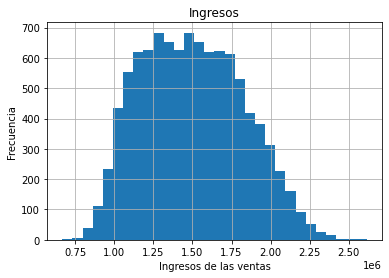

           ingresos
count  1.000000e+04
mean   1.499588e+06
std    3.258234e+05
min    6.666295e+05
25%    1.237291e+06
50%    1.485033e+06
75%    1.740750e+06
max    2.614981e+06
(1493200.8960353208, 1505974.4830555713)
(860908.3385329248, 2138267.0405579675)


In [8]:
# parámetros del modelo
media_precio = 100
desv_est_precio = 10
min_unids = 10000
max_unids = 20000


#generación de precios y unids
n_exps = 10000
precios = norm.rvs(loc=media_precio, scale=desv_est_precio, size=n_exps)
unids = randint.rvs(min_unids, max_unids, size=n_exps)


# ventas 
ingresos = pd.DataFrame()

lista_ingresos = []
for i in range(n_exps):
    lista_ingresos.append(precios[i]*unids[i])
    
ingresos["ingresos"] = lista_ingresos
ingresos.head()


ingresos.hist(bins=30)
plt.title('Ingresos')
plt.xlabel('Ingresos de las ventas')
plt.ylabel('Frecuencia')
plt.show()


print(ingresos.describe())

# intervalo de confianza para la media
print(st.t.interval(alpha=0.95, df=len(ingresos)-1,
              loc=ingresos["ingresos"].mean(),
              scale=ingresos["ingresos"].std()/math.sqrt(len(ingresos))))



# intervalo de confianza para la variable aleatoria
print(st.t.interval(alpha=0.95, df=len(ingresos)-1,
              loc=ingresos["ingresos"].mean(),
              scale=ingresos["ingresos"].std()))

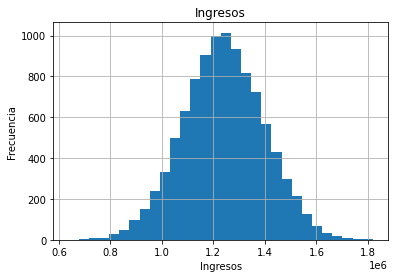

           ingresos
count  1.000000e+04
mean   1.240027e+06
std    1.569064e+05
min    6.377358e+05
25%    1.134665e+06
50%    1.239436e+06
75%    1.347177e+06
max    1.819456e+06
(1236950.8550919467, 1243102.2192588015)
(932458.3288326268, 1547594.7455181214)


In [26]:
# parámetros del modelo
media_precio = 80
desv_est_precio = 10
min_unids = 15000
max_unids = 16000


#generación de precios y unids
n_exps = 10000
precios = norm.rvs(loc=media_precio, scale=desv_est_precio, size=n_exps)
unids = randint.rvs(min_unids, max_unids, size=n_exps)


# ventas 
ingresos_2 = pd.DataFrame()

lista_ingresos = []
for i in range(n_exps):
    lista_ingresos.append( precios[i]*unids[i])
    
ingresos_2["ingresos"] = lista_ingresos

ingresos_2.hist(bins=30)
plt.title('Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()


print(ingresos_2.describe())

# intervalo de confianza para la media
print(st.t.interval(alpha=0.95, df=len(ingresos)-1,
              loc=ingresos_2["ingresos"].mean(),
              scale=ingresos_2["ingresos"].std()/math.sqrt(len(ingresos_2))))



# intervalo de confianza para la variable aleatoria
print(st.t.interval(alpha=0.95, df=len(ingresos_2)-1,
              loc=ingresos_2["ingresos"].mean(),
              scale=ingresos_2["ingresos"].std()))

In [29]:
import scipy.stats as stats

#realice dos pruebas t de muestra con varianzas iguales
stats.ttest_ind (a = ingresos, b = ingresos_2)

Ttest_indResult(statistic=array([71.77417565]), pvalue=array([0.]))

In [27]:
np.percentile(ingresos, 10)

1078045.3439135412

In [28]:
np.percentile(ingresos_2, 10)

1039613.1876707771

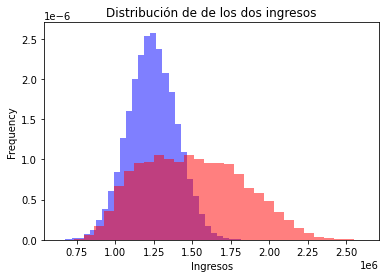

In [32]:
fig, ax = plt.subplots()

ax.hist(ingresos_2, bins=30, density=True,color="blue",label="Ingresos_2",alpha=0.5)
ax.hist(ingresos, bins=30, density=True,color="red",label="Ingresos",alpha=0.5)

ax.set_xlabel("Ingresos")
ax.set_ylabel("Frequency")
ax.set_title("Distribución de de los dos ingresos")
plt.show()

In [31]:
import scipy.stats as stats
mean_ingresos = ingresos["ingresos"].mean()
mean_ingresos_2 = ingresos_2["ingresos"].mean()


t_stat, p_value = stats.ttest_ind(ingresos, ingresos_2)
print("t_stat: ", t_stat)
print("p_value: ", p_value)
if p_value < 0.05:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

#Calculemos un intervalo al 95 pociento
alfa = 0.05
conf_interval=stats.t.interval(1-alfa,len(ingresos)-1, loc=mean_ingresos, scale=stats.sem(ingresos))
print(conf_interval, " es el intervalo de confianza para los ingresos_1")

conf_interval_2=stats.t.interval(1-alfa,len(ingresos_2)-1, loc=mean_ingresos_2, scale=stats.sem(ingresos_2))
print(conf_interval_2, " es el intervalo de confianza para los ingresos_2")

t_stat:  [71.77417565]
p_value:  [0.]
Rechazamos la hipótesis nula
(array([1493200.89603532]), array([1505974.48305557]))  es el intervalo de confianza para los ingresos_1
(array([1236950.85509195]), array([1243102.2192588]))  es el intervalo de confianza para los ingresos_2
